In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, silhouette_score


In [ ]:
df_egrid2023 = pd.read_excel('egrid2023_data.xlsx', sheet_name='UNT23', skiprows=[1])

In [ ]:
df_egrid2022 = pd.read_excel('egrid2022_data.xlsx', sheet_name='UNT22', skiprows=[1])

In [ ]:
df_egrid2023.shape

(26186, 33)

In [ ]:
df_egrid2022.shape

(25424, 32)

In [ ]:
df_egrid2023.head()

,Unit file sequence number,Data Year,Plant state abbreviation,Plant name,DOE/EIA ORIS plant or facility code,Unit ID,Prime Mover,Unit Operational Status,CAMD program flag,Program code(s),...,Unit unadjusted annual NOx emissions source,Unit unadjusted ozone season NOx emissions source,Unit unadjusted annual SO2 emissions source,Unit unadjusted annual CO2 emissions source,Unit unadjusted annual Hg emissions source,Unit SO2 (scrubber) first control device,Unit NOx first control device,Unit Hg Activated carbon injection system flag,Unit year on-line,Stack height (feet)
0,1,2023,AK,Alakanuk,57053,UNIT4,IC,SB,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2023,AK,Allison Creek Hydro,58982,GEN1,HY,OP,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2023,AK,Ambler,60243,1A,IC,OP,NaN,NaN,...,Estimated using emissions factor,Estimated using emissions factor,Estimated using emissions factor,Estimated using emissions factor,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2023,AK,Ambler,60243,2,IC,OP,NaN,NaN,...,Estimated using emissions factor,Estimated using emissions factor,Estimated using emissions factor,Estimated using emissions factor,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2023,AK,Ambler,60243,3,IC,OP,NaN,NaN,...,Estimated using emissions factor,Estimated using emissions factor,Estimated using emissions factor,Estimated using emissions factor,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_egrid2023.columns

Index(['Unit file sequence number', 'Data Year', 'Plant state abbreviation',
       'Plant name', 'DOE/EIA ORIS plant or facility code', 'Unit ID',
       'Prime Mover', 'Unit Operational Status', 'CAMD program flag',
       'Program code(s)', 'Unit bottom and firing type',
       'Number of associated generators', 'Unit primary fuel',
       'Unit operating hours', 'Unit unadjusted annual heat input (MMBtu)',
       'Unit unadjusted ozone season heat input (MMBtu)',
       'Unit unadjusted annual NOx emissions (tons)',
       'Unit unadjusted ozone season NOx emissions (tons)',
       'Unit unadjusted annual SO2 emissions (tons)',
       'Unit unadjusted annual CO2 emissions (tons)',
       'Unit unadjusted annual Hg emissions (lbs)',
       'Unit unadjusted annual heat input source',
       'Unit unadjusted ozone season heat input source',
       'Unit unadjusted annual NOx emissions source',
       'Unit unadjusted ozone season NOx emissions source',
       'Unit unadjusted annual S

In [163]:
df_egrid2023.describe()

,Unit file sequence number,Data Year,DOE/EIA ORIS plant or facility code,Number of associated generators,Unit operating hours,Unit unadjusted annual heat input (MMBtu),Unit unadjusted ozone season heat input (MMBtu),Unit unadjusted annual NOx emissions (tons),Unit unadjusted ozone season NOx emissions (tons),Unit unadjusted annual SO2 emissions (tons),Unit unadjusted annual CO2 emissions (tons),Unit unadjusted annual Hg emissions (lbs),Unit year on-line,Stack height (feet)
count,26186.000000,26186.0,26186.000000,1949.000000,3969.000000,2.372900e+04,2.373000e+04,11819.000000,11819.000000,11908.000000,1.191000e+04,358.000000,3978.000000,872.000000
mean,13094.256702,2023.0,40446.479837,1.732683,3055.667674,1.493462e+06,6.831555e+05,101.459436,45.104778,79.056700,1.551497e+05,13.288897,1993.771493,399.013532
std,7559.710300,0.0,26559.568976,1.329211,2938.783672,6.747887e+06,2.985294e+06,321.736842,142.195358,531.287507,4.798140e+05,20.427803,17.045040,237.782575
min,1.000000,2023.0,1.000000,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1938.000000,53.000000
25%,6548.250000,2023.0,6474.000000,1.000000,366.000000,5.838000e+03,2.611250e+03,0.793000,0.310000,0.014100,4.744575e+01,3.202000,1978.000000,186.000000
50%,13094.500000,2023.0,56241.500000,1.000000,1768.000000,3.182000e+04,1.422883e+04,9.138000,4.214000,0.160000,2.992449e+03,7.219000,2001.000000,350.000000
75%,19640.750000,2023.0,61113.750000,2.000000,6035.000000,3.775215e+05,1.684202e+05,63.334000,28.336000,1.533000,4.896111e+04,15.679500,2004.000000,563.250000
max,26187.000000,2023.0,70454.000000,9.000000,8760.000000,1.228041e+08,5.290050e+07,6463.765000,2776.435000,13752.546000,7.528240e+06,167.564000,2023.000000,1038.000000


In [164]:
df_egrid2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26186 entries, 0 to 26185
Data columns (total 33 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Unit file sequence number                          26186 non-null  int64  
 1   Data Year                                          26186 non-null  int64  
 2   Plant state abbreviation                           26186 non-null  object 
 3   Plant name                                         26186 non-null  object 
 4   DOE/EIA ORIS plant or facility code                26186 non-null  int64  
 5   Unit ID                                            26186 non-null  object 
 6   Prime Mover                                        26186 non-null  object 
 7   Unit Operational Status                            25981 non-null  object 
 8   CAMD program flag                                  3984 non-null   object 
 9   Progra

In [165]:
# Focus on these key numerical columns
emission_columns = [
    'Unit unadjusted annual NOx emissions (tons)',
    'Unit unadjusted annual SO2 emissions (tons)',
    'Unit unadjusted annual CO2 emissions (tons)'
]

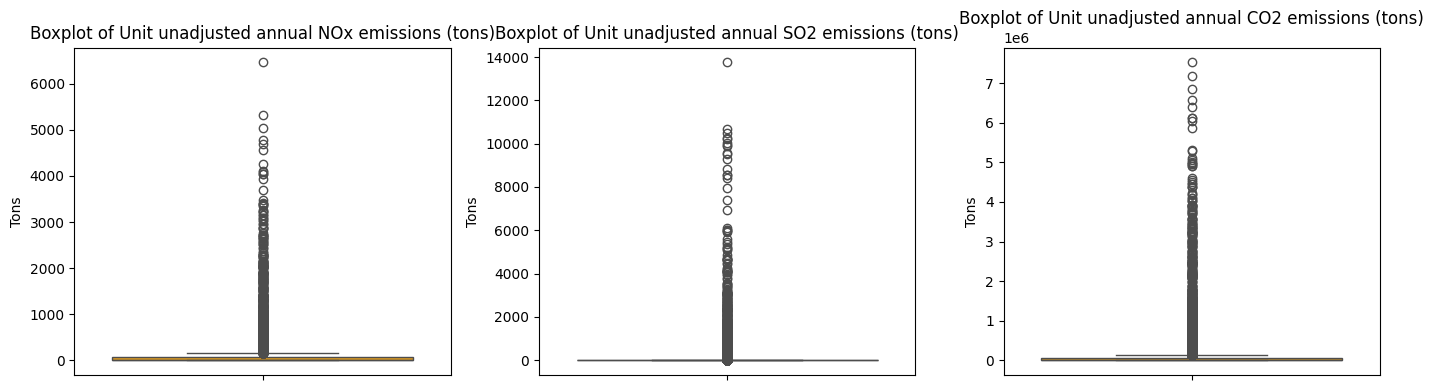

In [168]:

# ----------------------------
# 1. Boxplots for Outlier Detection
# ----------------------------
plt.figure(figsize=(14, 4))
for idx, col in enumerate(emission_columns):
    plt.subplot(1, 3, idx + 1)
    sns.boxplot(y=df_egrid2023[col], color='orange')
    plt.title(f'Boxplot of {col}')
    plt.ylabel('Tons')

plt.tight_layout()
plt.show()


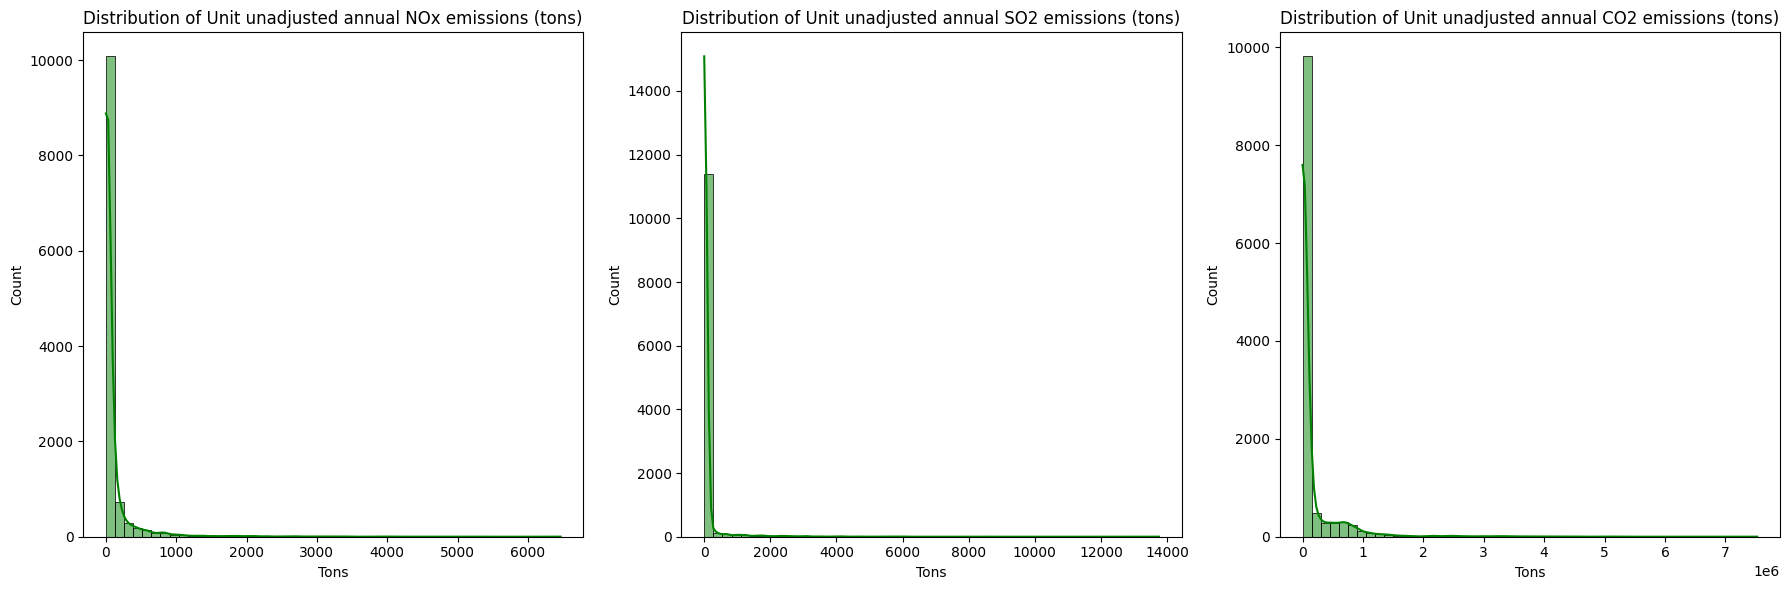

In [169]:
# ----------------------------
# 2. Distribution Plots (Histograms)
# ----------------------------
plt.figure(figsize=(18, 6))
for idx, col in enumerate(emission_columns):
    plt.subplot(1, 3, idx + 1)
    sns.histplot(df_egrid2023[col], bins=50, kde=True, color='green')
    plt.title(f'Distribution of {col}')
    plt.xlabel('Tons')

plt.tight_layout()
plt.show()

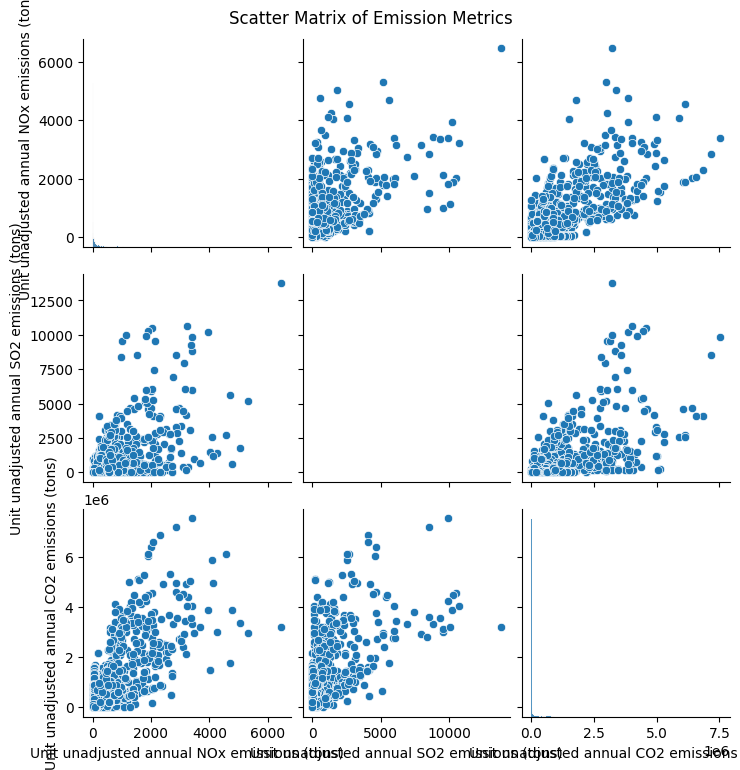

In [171]:
# ----------------------------
# 3. Scatter Plot Matrix (Pairplot)
# ----------------------------
sns.pairplot(df_egrid2023[emission_columns])
plt.suptitle('Scatter Matrix of Emission Metrics', y=1.02)
plt.show()

In [ ]:
df_egrid2022.columns

Index(['Unit file sequence number', 'Data Year', 'Plant state abbreviation',
       'Plant name', 'DOE/EIA ORIS plant or facility code', 'Unit ID',
       'Prime Mover', 'Unit Operational Status', 'CAMD program flag',
       'Program code(s)', 'Unit bottom and firing type',
       'Number of associated generators', 'Unit primary fuel',
       'Unit operating hours', 'Unit unadjusted annual heat input (MMBtu)',
       'Unit unadjusted ozone season heat input (MMBtu)',
       'Unit unadjusted annual NOx emissions (tons)',
       'Unit unadjusted ozone season NOx emissions (tons)',
       'Unit unadjusted annual SO2 emissions (tons)',
       'Unit unadjusted annual CO2 emissions (tons)',
       'Unit unadjusted annual Hg emissions (lbs)',
       'Unit unadjusted annual heat input source',
       'Unit unadjusted ozone season heat input source',
       'Unit unadjusted annual NOx emissions source',
       'Unit unadjusted ozone season NOx emissions source',
       'Unit unadjusted annual S

In [160]:
df_corr = df_egrid2023.drop(columns=['Data Year','Unit operating hours', 'Unit unadjusted annual heat input (MMBtu)',
       'Unit unadjusted ozone season heat input (MMBtu)',])

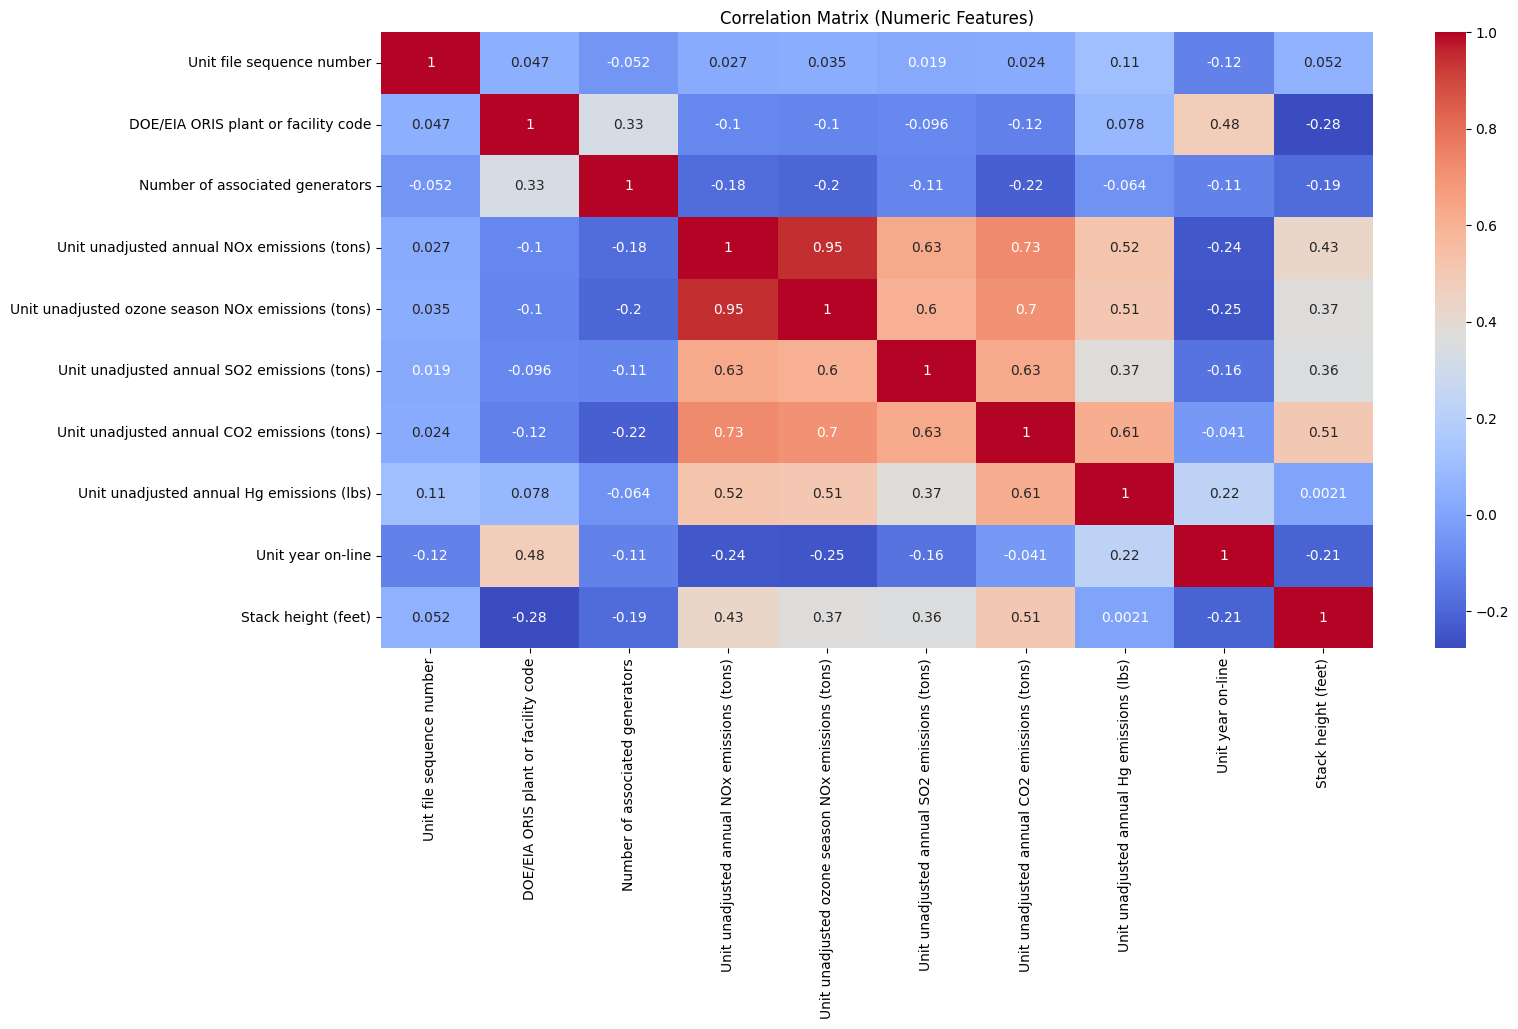

In [161]:
# Example for numeric-only correlation
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 8))  # 👈 Set width and height here
corr_matrix = df_corr.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

plt.title("Correlation Matrix (Numeric Features)")
plt.show()

In [ ]:
df_2023 = df_egrid2023[['Plant state abbreviation', 'Plant name', 'Unit unadjusted annual NOx emissions (tons)',
                            'Unit unadjusted annual SO2 emissions (tons)','Unit unadjusted annual CO2 emissions (tons)']]

In [ ]:
df_2022 = df_egrid2022[['Plant state abbreviation', 'Plant name', 'Unit unadjusted annual NOx emissions (tons)',
                            'Unit unadjusted annual SO2 emissions (tons)','Unit unadjusted annual CO2 emissions (tons)']]

In [ ]:
df_2023.head()

,Plant state abbreviation,Plant name,Unit unadjusted annual NOx emissions (tons),Unit unadjusted annual SO2 emissions (tons),Unit unadjusted annual CO2 emissions (tons)
0,AK,Alakanuk,NaN,NaN,NaN
1,AK,Allison Creek Hydro,NaN,NaN,NaN
2,AK,Ambler,8.323,0.7265,409.176
3,AK,Ambler,6.243,0.5449,306.882
4,AK,Ambler,8.323,0.7265,409.176


In [ ]:
df_2022.head()

,Plant state abbreviation,Plant name,Unit unadjusted annual NOx emissions (tons),Unit unadjusted annual SO2 emissions (tons),Unit unadjusted annual CO2 emissions (tons)
0,AK,Agrium Kenai Nitrogen Operations,NaN,NaN,NaN
1,AK,Agrium Kenai Nitrogen Operations,NaN,NaN,NaN
2,AK,Agrium Kenai Nitrogen Operations,NaN,NaN,NaN
3,AK,Agrium Kenai Nitrogen Operations,NaN,NaN,NaN
4,AK,Agrium Kenai Nitrogen Operations,NaN,NaN,NaN


In [ ]:
df_2023.shape

(26186, 5)

In [ ]:
df_2022.shape

(25424, 5)

In [ ]:
df_2023.isnull().sum()

,0
Plant state abbreviation,0
Plant name,0
Unit unadjusted annual NOx emissions (tons),14367
Unit unadjusted annual SO2 emissions (tons),14278
Unit unadjusted annual CO2 emissions (tons),14276


In [ ]:
df_2022.isnull().sum()

,0
Plant state abbreviation,0
Plant name,0
Unit unadjusted annual NOx emissions (tons),13326
Unit unadjusted annual SO2 emissions (tons),13336
Unit unadjusted annual CO2 emissions (tons),13327


In [ ]:
df_2023.dropna(inplace=True)

<ipython-input-117-f38ced7a582e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023.dropna(inplace=True)


In [ ]:
df_2022.dropna(inplace=True)

<ipython-input-118-d354d92b4612>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022.dropna(inplace=True)


In [ ]:
# Example: If not already, ensure Plant name columns are clean
df_2023['Plant name'] = df_2023['Plant name'].str.strip()
df_2022['Plant name'] = df_2022['Plant name'].str.strip()

# Merge the two DataFrames based on Plant state and Plant name
df_merged = pd.merge(
    df_2023,
    df_2022,
    how='inner',  # Only keep plants present in both years
    on=['Plant state abbreviation', 'Plant name'],
    suffixes=('_2023', '_2022')  # Differentiate between columns from each year
)

# View the new merged DataFrame
print(df_merged.head())

  Plant state abbreviation Plant name  \
0                       AK     Ambler   
1                       AK     Ambler   
2                       AK     Ambler   
3                       AK     Ambler   
4                       AK     Ambler   

   Unit unadjusted annual NOx emissions (tons)_2023  \
0                                             8.323   
1                                             8.323   
2                                             8.323   
3                                             6.243   
4                                             6.243   

   Unit unadjusted annual SO2 emissions (tons)_2023  \
0                                            0.7265   
1                                            0.7265   
2                                            0.7265   
3                                            0.5449   
4                                            0.5449   

   Unit unadjusted annual CO2 emissions (tons)_2023  \
0                                   

<ipython-input-119-8875733a815b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023['Plant name'] = df_2023['Plant name'].str.strip()
<ipython-input-119-8875733a815b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022['Plant name'] = df_2022['Plant name'].str.strip()


In [ ]:
# # Clean plant names
# df_2023['Plant name'] = df_2023['Plant name'].str.strip()
# df_2022['Plant name'] = df_2022['Plant name'].str.strip()

# # Add a 'Year' column to both
# df_2023['Year'] = 2023
# df_2022['Year'] = 2022

# # Keep only needed columns (and align them)
# cols = ['Plant state abbreviation', 'Plant name', 'Unit unadjusted annual NOx emissions (tons)',
#         'Unit unadjusted annual SO2 emissions (tons)', 'Unit unadjusted annual CO2 emissions (tons)', 'Year']

# df_2023 = df_2023[cols]
# df_2022 = df_2022[cols]

# # Stack (vertical concat)
# df_stacked = pd.concat([df_2023, df_2022], axis=0).reset_index(drop=True)

# # # See result
# # print(df_stacked.head())

In [ ]:
df_merged.head()

,Plant state abbreviation,Plant name,Unit unadjusted annual NOx emissions (tons)_2023,Unit unadjusted annual SO2 emissions (tons)_2023,Unit unadjusted annual CO2 emissions (tons)_2023,Unit unadjusted annual NOx emissions (tons)_2022,Unit unadjusted annual SO2 emissions (tons)_2022,Unit unadjusted annual CO2 emissions (tons)_2022
0,AK,Ambler,8.323,0.7265,409.176,7.998,0.6981,393.140
1,AK,Ambler,8.323,0.7265,409.176,5.999,0.5235,294.855
2,AK,Ambler,8.323,0.7265,409.176,7.998,0.6981,393.140
3,AK,Ambler,6.243,0.5449,306.882,7.998,0.6981,393.140
4,AK,Ambler,6.243,0.5449,306.882,5.999,0.5235,294.855


In [ ]:
df_merged.shape

(82188, 8)

In [ ]:
df_merged.isnull().sum()

,0
Plant state abbreviation,0
Plant name,0
Unit unadjusted annual NOx emissions (tons)_2023,0
Unit unadjusted annual SO2 emissions (tons)_2023,0
Unit unadjusted annual CO2 emissions (tons)_2023,0
Unit unadjusted annual NOx emissions (tons)_2022,0
Unit unadjusted annual SO2 emissions (tons)_2022,0
Unit unadjusted annual CO2 emissions (tons)_2022,0


In [ ]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82188 entries, 0 to 82187
Data columns (total 8 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Plant state abbreviation                          82188 non-null  object 
 1   Plant name                                        82188 non-null  object 
 2   Unit unadjusted annual NOx emissions (tons)_2023  82188 non-null  float64
 3   Unit unadjusted annual SO2 emissions (tons)_2023  82188 non-null  float64
 4   Unit unadjusted annual CO2 emissions (tons)_2023  82188 non-null  float64
 5   Unit unadjusted annual NOx emissions (tons)_2022  82188 non-null  float64
 6   Unit unadjusted annual SO2 emissions (tons)_2022  82188 non-null  float64
 7   Unit unadjusted annual CO2 emissions (tons)_2022  82188 non-null  float64
dtypes: float64(6), object(2)
memory usage: 5.0+ MB


In [131]:
df_plants  = pd.read_csv('Power_Plants.csv')

In [132]:
# Missing Values Analysis
df_plants.isnull().sum()

,0
OBJECTID,0
PLANT_CODE,0
NAME,0
ADDRESS,2
CITY,0
STATE,0
ZIP,0
TELEPHONE,0
TYPE,0
STATUS,0


In [133]:
# Missing Values Analysis
df_plants.dropna(inplace=True)

In [134]:
df_plants.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13229 entries, 0 to 13231
Data columns (total 46 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   OBJECTID    13229 non-null  int64  
 1   PLANT_CODE  13229 non-null  object 
 2   NAME        13229 non-null  object 
 3   ADDRESS     13229 non-null  object 
 4   CITY        13229 non-null  object 
 5   STATE       13229 non-null  object 
 6   ZIP         13229 non-null  object 
 7   TELEPHONE   13229 non-null  object 
 8   TYPE        13229 non-null  object 
 9   STATUS      13229 non-null  object 
 10  COUNTY      13229 non-null  object 
 11  COUNTYFIPS  13229 non-null  object 
 12  COUNTRY     13229 non-null  object 
 13  LATITUDE    13229 non-null  float64
 14  LONGITUDE   13229 non-null  float64
 15  NAICS_CODE  13229 non-null  object 
 16  NAICS_DESC  13229 non-null  object 
 17  SOURCE      13229 non-null  object 
 18  SOURCEDATE  13229 non-null  object 
 19  VAL_METHOD  13229 non-null  ob

In [137]:
df_merged.shape

(82188, 9)

## Modeling

<ipython-input-144-bbfa01bc5c18>:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Pollution_Level'] = np.select(conditions, choices, default='Low Risk')
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:11:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



--- Logistic Regression ---
              precision    recall  f1-score   support

   High Risk       0.94      0.93      0.93      4315
    Low Risk       0.82      0.93      0.87      8417
 Medium Risk       0.67      0.47      0.55      3706

    accuracy                           0.83     16438
   macro avg       0.81      0.78      0.79     16438
weighted avg       0.82      0.83      0.82     16438

Accuracy: 0.8275337632315367

--- Random Forest ---
              precision    recall  f1-score   support

   High Risk       0.95      0.96      0.96      4315
    Low Risk       0.82      0.94      0.88      8417
 Medium Risk       0.72      0.48      0.58      3706

    accuracy                           0.84     16438
   macro avg       0.83      0.79      0.80     16438
weighted avg       0.83      0.84      0.83     16438

Accuracy: 0.8403090400292006

--- XGBoost ---
              precision    recall  f1-score   support

   High Risk       0.95      0.95      0.95      4315
  

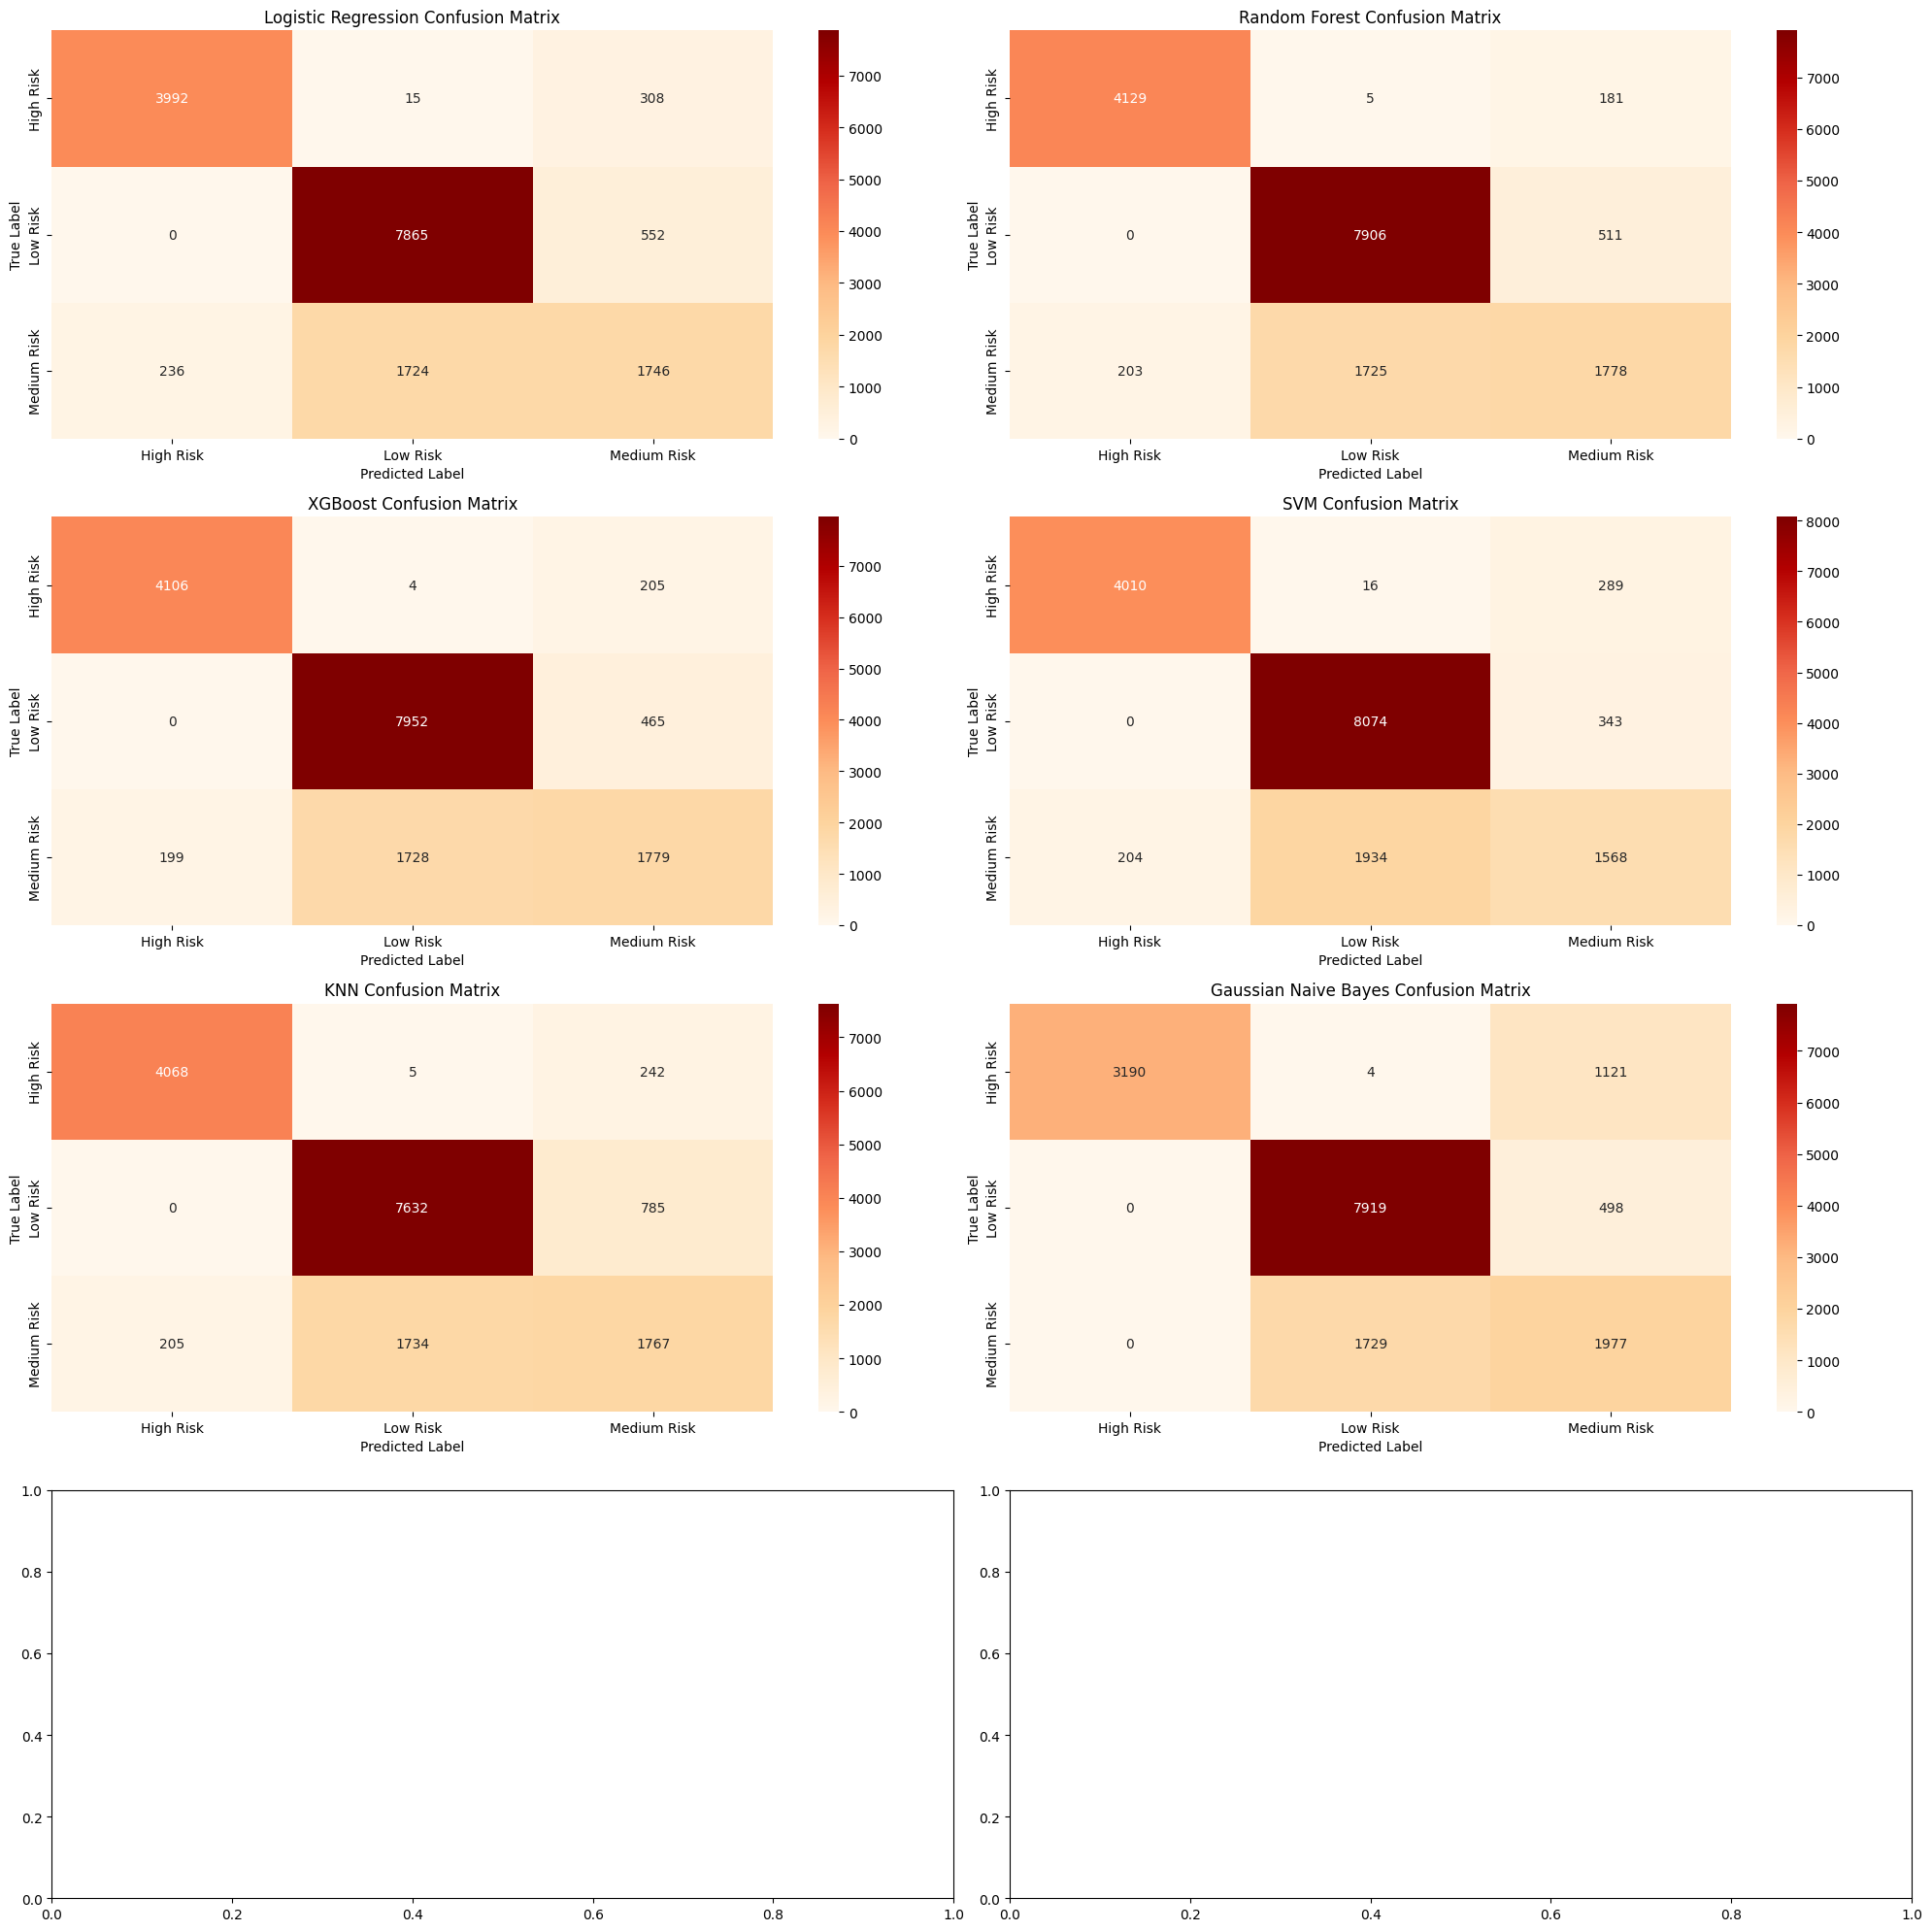

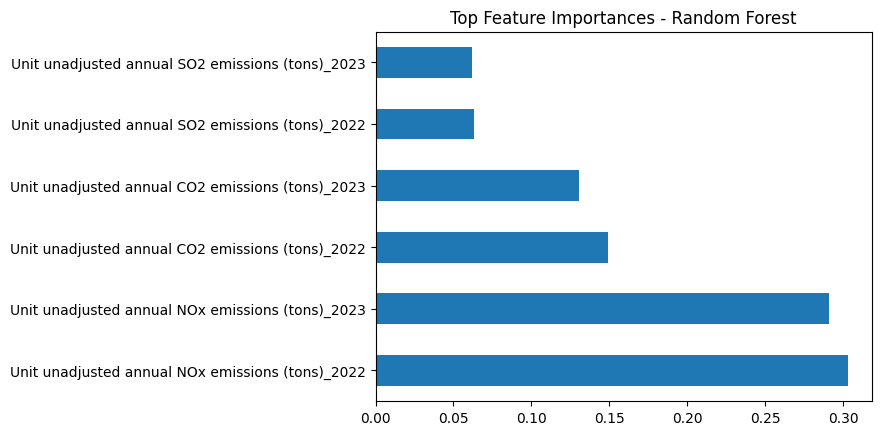

In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# ----------------------------
# 1. Load your merged DataFrame (X)
# ----------------------------
# Assuming 'X' already contains your emissions columns from 2023 and 2022
X = df_merged[['Unit unadjusted annual CO2 emissions (tons)_2023',
              'Unit unadjusted annual SO2 emissions (tons)_2023',
              'Unit unadjusted annual NOx emissions (tons)_2023',
              'Unit unadjusted annual CO2 emissions (tons)_2022',
              'Unit unadjusted annual SO2 emissions (tons)_2022',
              'Unit unadjusted annual NOx emissions (tons)_2022']]
# ----------------------------
# 2. Create Pollution Level Label
# ----------------------------
conditions = [
    # High/Extreme Risk
    ( (X['Unit unadjusted annual CO2 emissions (tons)_2023'] > 100000) |
      (X['Unit unadjusted annual SO2 emissions (tons)_2023'] > 50) |
      (X['Unit unadjusted annual NOx emissions (tons)_2023'] > 50) |
      (X['Unit unadjusted annual CO2 emissions (tons)_2022'] > 100000) |
      (X['Unit unadjusted annual SO2 emissions (tons)_2022'] > 50) |
      (X['Unit unadjusted annual NOx emissions (tons)_2022'] > 50)
    ),

    # Medium Risk
    ( ( (X['Unit unadjusted annual CO2 emissions (tons)_2023'] > 10000) &
        (X['Unit unadjusted annual CO2 emissions (tons)_2023'] <= 100000) ) |
      ( (X['Unit unadjusted annual SO2 emissions (tons)_2023'] > 10) &
        (X['Unit unadjusted annual SO2 emissions (tons)_2023'] <= 50) ) |
      ( (X['Unit unadjusted annual NOx emissions (tons)_2023'] > 10) &
        (X['Unit unadjusted annual NOx emissions (tons)_2023'] <= 50) ) |
      ( (X['Unit unadjusted annual CO2 emissions (tons)_2022'] > 10000) &
        (X['Unit unadjusted annual CO2 emissions (tons)_2022'] <= 100000) ) |
      ( (X['Unit unadjusted annual SO2 emissions (tons)_2022'] > 10) &
        (X['Unit unadjusted annual SO2 emissions (tons)_2022'] <= 50) ) |
      ( (X['Unit unadjusted annual NOx emissions (tons)_2022'] > 10) &
        (X['Unit unadjusted annual NOx emissions (tons)_2022'] <= 50) )
    )
]

choices = ['High Risk', 'Medium Risk']
X['Pollution_Level'] = np.select(conditions, choices, default='Low Risk')

# ----------------------------
# 3. Prepare Data for Modeling
# ----------------------------
features = [
    'Unit unadjusted annual NOx emissions (tons)_2023',
    'Unit unadjusted annual SO2 emissions (tons)_2023',
    'Unit unadjusted annual CO2 emissions (tons)_2023',
    'Unit unadjusted annual NOx emissions (tons)_2022',
    'Unit unadjusted annual SO2 emissions (tons)_2022',
    'Unit unadjusted annual CO2 emissions (tons)_2022'
]

X_model = X[features]
y_model = X['Pollution_Level']

# Encode target labels
le = LabelEncoder()
y_encoded = le.fit_transform(y_model)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_model)


# Add small random noise to scaled features
np.random.seed(42)  # for reproducibility
noise = np.random.normal(loc=0.0, scale=0.05, size=X_scaled.shape)  # noise with mean=0, std=0.05
X_noisy = X_scaled + noise

# Train-test split (stratified)
X_train, X_test, y_train, y_test = train_test_split(X_noisy, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# # Train-test split (stratified)
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# ----------------------------
# 4. Train Models
# ----------------------------
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Gaussian Naive Bayes': GaussianNB()
}

models_preds = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    models_preds[name] = preds

# ----------------------------
# 5. Evaluate Models
# ----------------------------

def evaluate_model(name, y_test, y_pred):
    print(f"\n--- {name} ---")
    print(classification_report(y_test, y_pred, target_names=le.classes_))
    print("Accuracy:", accuracy_score(y_test, y_pred))

for model_name, y_pred in models_preds.items():
    evaluate_model(model_name, y_test, y_pred)

# Confusion Matrices
# fig, axs = plt.subplots(4, 2, figsize=(20, 20))
# axs = axs.flatten()
# for idx, (model_name, y_pred) in enumerate(models_preds.items()):
#     sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', ax=axs[idx], cmap='OrRd')
#     axs[idx].set_title(f'{model_name} Confusion Matrix')
#     axs[idx].set_xlabel('Predicted')
#     axs[idx].set_ylabel('Actual')

# plt.tight_layout()
# plt.show()
# Confusion Matrices
fig, axs = plt.subplots(4, 2, figsize=(20, 20))
axs = axs.flatten()

# Get class names from label encoder
class_names = le.classes_

for idx, (model_name, y_pred) in enumerate(models_preds.items()):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', ax=axs[idx], cmap='OrRd',
                xticklabels=class_names, yticklabels=class_names)  # <-- added labels
    axs[idx].set_title(f'{model_name} Confusion Matrix')
    axs[idx].set_xlabel('Predicted Label')
    axs[idx].set_ylabel('True Label')

plt.tight_layout()
plt.show()

# ----------------------------
# 6. Feature Importance (Random Forest)
# ----------------------------
importances = models['Random Forest'].feature_importances_
feat_importances = pd.Series(importances, index=features)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('Top Feature Importances - Random Forest')
plt.show()


<ipython-input-162-345544f2cffa>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Accuracy', y='Model', data=accuracy_df, palette='viridis')


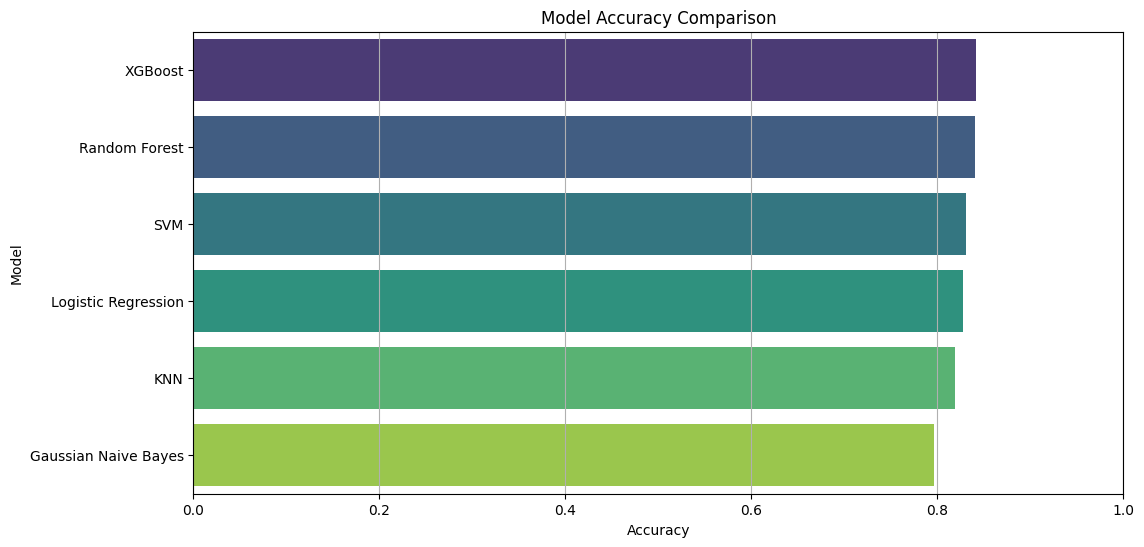

In [162]:

# Collect accuracy scores
model_accuracies = {}

for model_name, y_pred in models_preds.items():
    acc = accuracy_score(y_test, y_pred)
    model_accuracies[model_name] = acc

# Convert to pandas DataFrame
accuracy_df = pd.DataFrame(list(model_accuracies.items()), columns=['Model', 'Accuracy'])

# Sort by accuracy (optional for nicer plot)
accuracy_df = accuracy_df.sort_values(by='Accuracy', ascending=False)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Accuracy', y='Model', data=accuracy_df, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.xlim(0, 1)  # Accuracy is between 0 and 1
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.grid(axis='x')
plt.show()

## KMeans Clustering

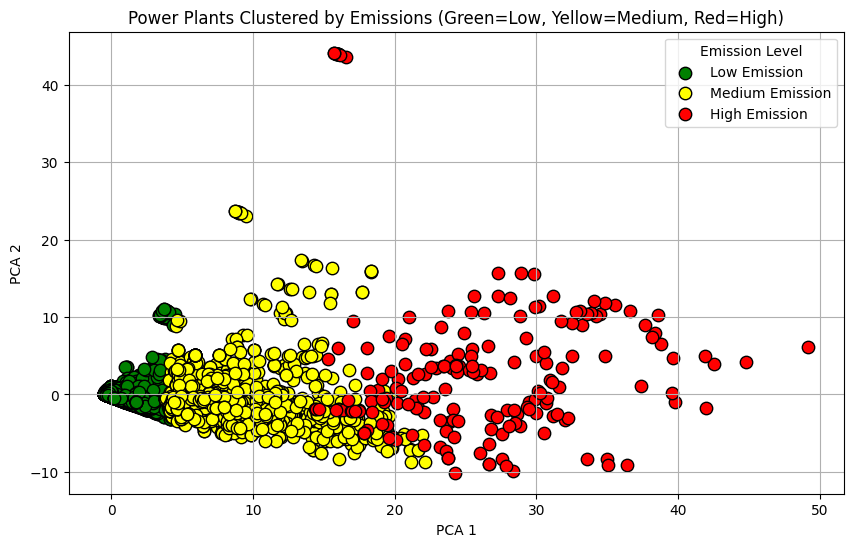


--- Cluster Summary ---
                  Unit unadjusted annual NOx emissions (tons)_2023  \
Emission_Cluster                                                     
High Emission                                          2248.700797   
Low Emission                                             41.438681   
Medium Emission                                         901.022145   

                  Unit unadjusted annual SO2 emissions (tons)_2023  \
Emission_Cluster                                                     
High Emission                                          5545.212927   
Low Emission                                              9.396788   
Medium Emission                                         952.295715   

                  Unit unadjusted annual CO2 emissions (tons)_2023  \
Emission_Cluster                                                     
High Emission                                         3.560277e+06   
Low Emission                                          4.779898e

In [157]:
X_cluster = X[features]

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

# ----------------------------
# 2. KMeans Clustering
# ----------------------------
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
X['Cluster_Label'] = clusters

# ----------------------------
# 3. Label Clusters as High, Medium, Low Emission
# ----------------------------
# Analyze cluster centers manually or by sorting mean emissions
cluster_means = X.groupby('Cluster_Label')[features].mean()

# Assign labels based on cluster mean emissions (manually after inspection)
def label_clusters(cluster):
    if cluster == cluster_means.sum(axis=1).idxmax():
        return 'High Emission'
    elif cluster == cluster_means.sum(axis=1).idxmin():
        return 'Low Emission'
    else:
        return 'Medium Emission'

X['Emission_Cluster'] = X['Cluster_Label'].apply(label_clusters)

# ----------------------------
# 4. PCA for Visualization
# ----------------------------
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
X['PCA1'] = X_pca[:,0]
X['PCA2'] = X_pca[:,1]

# ----------------------------
# 5. Plot Clusters with Color Labels
# ----------------------------
color_mapping = {
    'Low Emission': 'green',
    'Medium Emission': 'yellow',
    'High Emission': 'red'
}

X['Color'] = X['Emission_Cluster'].map(color_mapping)

plt.figure(figsize=(10,6))
for level in ['Low Emission', 'Medium Emission', 'High Emission']:
    subset = X[X['Emission_Cluster'] == level]
    plt.scatter(subset['PCA1'], subset['PCA2'],
                label=level,
                color=color_mapping[level],
                edgecolor='black',
                s=80)

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Power Plants Clustered by Emissions (Green=Low, Yellow=Medium, Red=High)')
plt.legend(title='Emission Level')
plt.grid(True)
plt.show()

# ----------------------------
# 6. Summary Table
# ----------------------------
print("\n--- Cluster Summary ---")
print(X.groupby('Emission_Cluster')[features].mean())